In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pyprogressivex
import random
from time import time

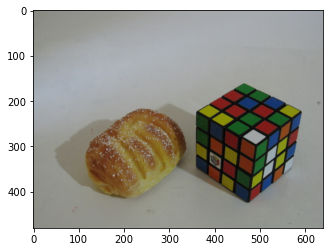

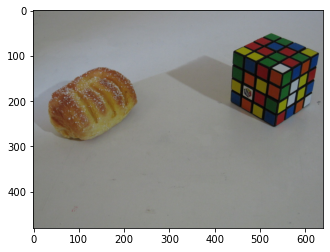

In [2]:
# Load the images
img1 = cv2.cvtColor(cv2.imread('img/breadcube1.png'), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread('img/breadcube2.png'), cv2.COLOR_BGR2RGB)
plt.imshow(img1)
plt.figure()
plt.imshow(img2)

In [3]:
# Load the correspondences from file
correspondences = np.loadtxt('img/breadcube.txt')
n = len(correspondences)
kps1 = np.float32([correspondences[i][0:2] for i in np.arange(n)]).reshape(-1,2)
kps2 = np.float32([correspondences[i][3:5] for i in np.arange(n)]).reshape(-1,2)

print("Number of correspondences loaded = ", str(len(correspondences)))

Number of correspondences loaded =  242


In [4]:
#Now, some visualization from OpenCV tutorial
#https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_feature2d/py_feature_homography/py_feature_homography.html
#We will draw correspondences found and the geometric transformation between the images.
from copy import deepcopy
def decolorize(img):
    return  cv2.cvtColor(cv2.cvtColor(img,cv2.COLOR_RGB2GRAY), cv2.COLOR_GRAY2RGB)

def random_color(label):
    if label == 0:
        return (255, 0, 0)
    elif label == 1:
        return (0, 255, 0)
    elif label == 2:
        return (0, 0, 255)
    return (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

def draw_labeling(img1, img2, labeling, correspondences):
    for label in range(max(labeling)):
        mask = labeling == label
        color = random_color(label)

        for i in range(len(labeling)):
            if mask[i]:
                cv2.circle(img1, (round(correspondences[i][0]), round(correspondences[i][1])), 4, color, -1)
                cv2.circle(img2, (round(correspondences[i][2]), round(correspondences[i][3])), 4, color, -1)

    plt.imshow(img1)
    plt.figure()
    plt.imshow(img2)

In [5]:
def verify_pyprogressivex(corrs):    
    threshold = 0.5
    
    motions, labeling = pyprogressivex.findTwoViewMotions(np.ascontiguousarray(corrs), 
        img1.shape[1], img1.shape[0], 
        img2.shape[1], img2.shape[0],
        threshold = threshold,
        conf = 0.5,
        spatial_coherence_weight = 0.5,
        neighborhood_ball_radius = 20,
        maximum_tanimoto_similarity = 0.4,
        max_iters = 10000,
        minimum_point_number = 7,
        maximum_model_number = 4,
        sampler_id = 0,
        scoring_exponent = 3.0,
        do_logging = False) 
    return motions, labeling

In [6]:
t = time()

motions, labeling = verify_pyprogressivex(correspondences)
model_number = motions.size / 9

print ('Time = ', time()-t, ' sec')
print ('Models found = {}'.format(model_number))

Time =  0.6195311546325684  sec
Models found = 2.0


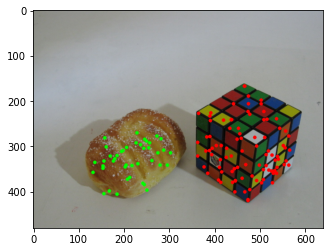

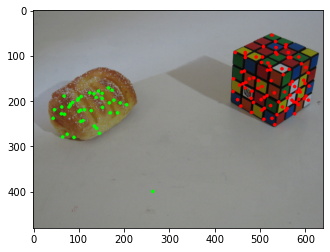

In [7]:
draw_labeling(img1, img2, labeling, correspondences)